# Validation Loss Stability

In [1]:
import sys
sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt

from herec.reader import *

## Basic Staristics

In [2]:
class statistician:

    def print_entity_num(self):

        user_num = self.df_RAW.get_column("user_id").n_unique()
        print("User #:", user_num)
        
        item_num = self.df_RAW.get_column("item_id").n_unique()
        print("Item #:", item_num)
        
        interaction_num = self.df_RAW.height
        print("Interaction #:", interaction_num)
        
        density = interaction_num / (user_num * item_num)
        print("Density:", round(density, 5))

        return self

    def print_interactions_by_users(self):

        # Interaction Times by users
        times = self.df_RAW.get_column("user_id").value_counts().get_column("counts").to_numpy()
        fig, ax = plt.subplots(figsize=(4, 2))
        ax.hist( times, bins=50 )
        ax.set_xlabel("Interaction #")
        ax.set_ylabel("User #")
        plt.tight_layout()
        plt.show()

        return self

    def print_interactions_by_items(self):

        # Interaction Times by items
        times = self.df_RAW.get_column("item_id").value_counts().get_column("counts").to_numpy()
        fig, ax = plt.subplots(figsize=(4, 2))
        ax.hist( times, bins=50 )
        ax.set_xlabel("Interaction #")
        ax.set_ylabel("Item #")
        plt.tight_layout()
        plt.show()

        return self

    def __init__(self, reader):

        # Take out df_RAW
        df_RAW = reader.df_RAW

        # Drop Duclicated Interaction
        df_RAW = df_RAW.unique(["user_id", "item_id"])

        # Set
        self.df_RAW = df_RAW    

        # Print
        self.print_entity_num()
        self.print_interactions_by_users()
        self.print_interactions_by_items()

User #: 942
Item #: 1447
Interaction #: 55375
Density: 0.04063


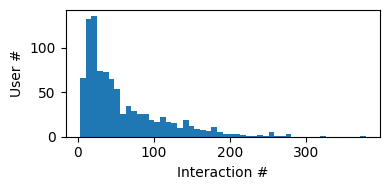

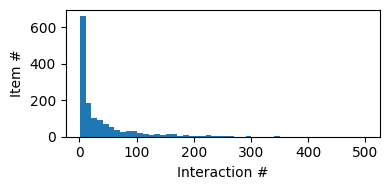

In [3]:
statistician( ML100K_IMPLICIT() )

User #: 6038
Item #: 3533
Interaction #: 575281
Density: 0.02697


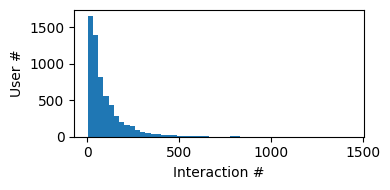

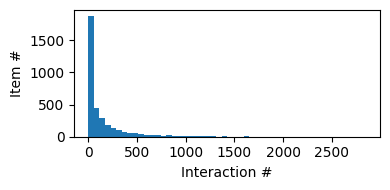

In [4]:
statistician( ML1M_IMPLICIT() )

User #: 100000
Item #: 162625
Interaction #: 1505158
Density: 9e-05


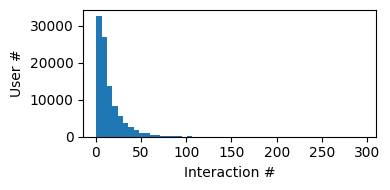

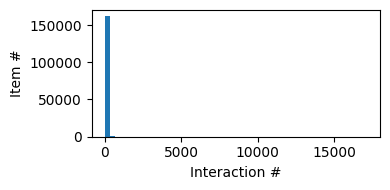

In [5]:
statistician( Twitch100K() )

User #: 87934
Item #: 71976
Interaction #: 321466
Density: 5e-05


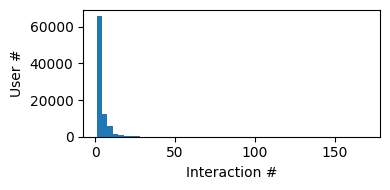

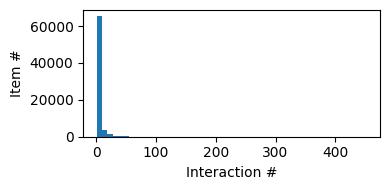

In [6]:
statistician( DIGINETICA() )